# Recurrent Neural Network - LSTM


## SALVAR CONTEÚDO NO DRIVE PESSOAL!!!!! BAIXAR ESTA PASTA E FAZER UPLOAD PARA O SEU DRIVE

## Mount do drive pessoal

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
workdir_path = '/content/drive/My Drive/' + '00 PUC BI MASTER/05 - RN'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

In [4]:
#Verificar se a pasta mapeada contem os arquivos abaixo
!ls

 Aula02.pdf	       RedesRecorrentesAirPassengers_flavia.ipynb
 Churn_Modelling.csv   RN_Aula03_DNN.ipynb
 DL_Aula03.pdf	       test.csv
 DL_Aula04.pdf	      'Trabalho Final RN'
 ExercíciosCNN	       train.csv
 ExercíciosCNNFlavia


## Parte 1 - Preprocessamento de Dados

### Importar as bibliotecas

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Importar a base de dados

In [0]:
dataset_train = pd.read_csv('train.csv')
training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si

In [12]:
pd.DataFrame(training_set).head(5)

,0
0,112
1,118
2,132
3,129
4,121


### gráfico da série temporal

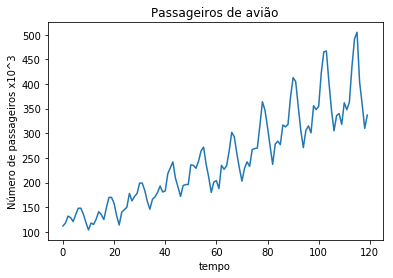

In [13]:
plt.plot(training_set)
plt.xlabel("tempo")
plt.ylabel("Número de passageiros x10^3")
plt.title("Passageiros de avião")
plt.show()

### Normalização

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Criar a estrutura de dados com janela 10 e output 1

In [0]:
window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Construção da Rede completa

In [0]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 100)           40800     
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 100)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 80)            57920     
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 80)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                26200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total para

### Treinamento

In [0]:
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
110/110 [==============================] - 3s 26ms/step - loss: 0.1725
Epoch 2/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 3/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 4/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 5/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 6/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 7/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 8/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 9/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 10/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 11/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 12/250
110/110 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 13/250

## Parte 3 - Fazer as previsões e analisar os resultados

### Base de teste

In [0]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Construir a estrutura para teste

In [0]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Fazer as previsões

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizar os resultados de treino e teste

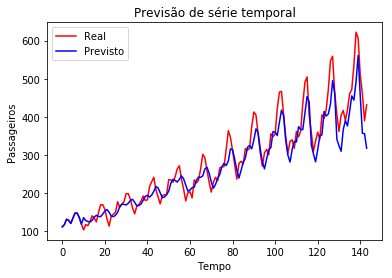

In [0]:
allTargetData = np.vstack((training_set, real_stock_price))
training_predicted_stock_price = regressor.predict(X_train)
training_predicted_stock_price = sc.inverse_transform(training_predicted_stock_price)
allForecastedData = np.vstack((training_set[0:window], training_predicted_stock_price, predicted_stock_price))
plt.plot(allTargetData, color = 'red', label = 'Real')
plt.plot(allForecastedData, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## Parte 4 - Métricas de avaliação

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: ', rmse)

RMSE:  65.6129021424806


In [0]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ',mse)

MSE:  4305.052927558737


In [0]:
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100
print('MAPE: ',mape)

MAPE:  11.75973426308261
